In [1]:
import seabreeze
import os
from datetime import date,datetime
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import time
from Microspectrometer import Microspectrometer

### Instantiate a new microspectrometer object. Called micro.

In [2]:
micro=Microspectrometer()

### Start a new experiment file called 12092022. If it already exists then the code will change directory to it.

In [ ]:
micro.start_new_experiment('12092022')

### Connect to the spectrometer. Do not turn on the spectrometer until it is connected via USB.

In [3]:
micro.connect()

TypeError: from_first_available() got an unexpected keyword argument 'emulate'

### Change integration time. The limits are dependent on device. It is in microseconds. 

In [ ]:
micro.change_integration_time(1.5E4)

AttributeError: 'Microspectrometer' object has no attribute 'spectrometer'

### Take a dark spectrum. Shutter off the lamp and block any stray light from entering the spectrometer fiber. 

In [ ]:
micro.measure('dark',number_of_scans=80,filename='dark.xy')

### Take a reference spectrum. Typically this is the buffer without sample to obtain absorbance.

In [ ]:
micro.measure('reference',number_of_scans=80,filename='reference_acid_water.xy')

### If you want to load a previous dark or reference you can use these commands below.

In [ ]:
#micro.load_spectrum('dark','dark.xy')
#micro.load_spectrum('reference','reference_acid_water.xy')

### To see all spectra collected by the spectrometer so far in this session.

In [ ]:
micro.describe_all_spectra()

Scan	DateTime	Comment


#### The 'current_spectrum' is the third type of data collection format (the other two being dark and reference). Notice a comment can be added.

In [ ]:
###TYPE FILENAME HERE AND COMMENT:
file=None#'sample_entering_mixer_5.xy' #If none it will timestamp the file.
comment='11:44pm noticing sample very decayed'
micro.measure('current_spectrum',filename=file,number_of_scans=80,comments=comment)
#plot absorbance returns the figure object in case you want to modify the plot. Here we are dumping the return with underscore.
_=micro.plot_absorbance()
#This below will plot transmission
#plt.plot(micro.wavelengths,micro.current_spectrum)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.legend(['Current']);

#### This will constantly plot the current Absorbance Spectrum. To exit use the stop button up top. ref_spec_index is the index of the plot to use as a reference (for plotting the "Starting Spectrum" This is not the reference used for the absorbance calculation. 

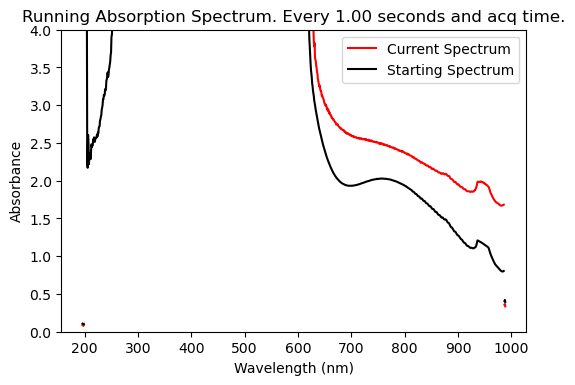

In [ ]:
micro.continuous_measurements(update_time=1.0,ref_spec_index=-1,save=True)

In [ ]:
micro.continuous_transmission(update_time=1.0,ref_spec_index=-1,save=True)

### The spectra 'should' save during the course of collection as long as save=True. For measure by default it is true for the continuous functions by default it is false.
### If something goes wrong for whatever reason, you can use the save_all_spectra() method to dump all spectra recorded so far. 

In [ ]:
micro.save_all_spectra()

### Things to keep in mind. If the Lamp saturates (see counts maxed out at 200,000 below) then that region of the spectrum is useless. You can move the fibers further apart. Using the 'balanced' lamp helps a little. At worse you can use an ND filter if that region is important. The visible light region is usually very high as the Halogen bulb >> deu bulb. This all depends on what wavelengths you are interested in and how you want to trade signal-to-noise.

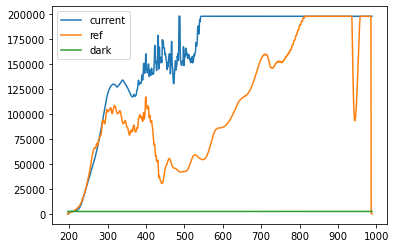

In [ ]:
plt.plot(micro.wavelengths,micro.current_spectrum)
plt.plot(micro.wavelengths,micro.reference)
plt.plot(micro.wavelengths,micro.dark)

#plt.plot(micro.wavelengths,a)
plt.legend(['current','ref','dark'])
#plt.ylim(0,10000)